In [1]:
library(MatchIt)
library(survival)
library(survminer)
library(tidyr)
library(tableone)
library(plotRCS)
library(rms)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma



Attaching package: ‘plotRCS’


The following object is masked from ‘package:survival’:

    cancer


Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [2]:
df_survival <- read.csv("df_eicu_c3_riskfactor.csv",as.is = TRUE)
df_survival <- as.data.frame(df_survival)
#df_survival$groupHPD <- as.factor(df_survival$groupHPD)
df_select <-  df_survival#[df_survival$time==1,] # subset(df_survival, time == c(1))


# Univariate
- Univariate analysis refers to the study of the degree of influence of a certain factor at different levels on an independent variable at a certain point in time

In [3]:
# # MIMIC
# 'los_sepsis_saaki',  'max_aki_stage_crea',
#        'max_aki_stage_uo', 'first_aki_stage', 'max_aki_stage', 'aki_endstage',
#        'aki_endstage_H7D',  
#        'gender', 'age', 'baseline_Scr', 'Peak_Scr', 'Discharge_Scr',
#        'Myocardial_infarct', 'Congestive_heart_failure',
#        'Peripheral_vascular_disease', 'Cerebrovascular_disease',
#        'Peptic_ulcer', 'Renal', 'Hepatic', 'Tumor',
#        'Cardiovascular', 'Acidosis', 'Cardiogenic_shock', 'Diabetes',
#        'Hypertension', 'Respiratory_failure', 'Septic_shock', 'is_vaso',
#        'is_mv', 'is_rrt', 'is_crrt'
# # AUMC
# 'los_sepsis_saaki',  'icu_stay_days', 'gender',
#        'age', 'weight', 'first_aki_stage', 'max_aki_stage', 'aki_endstage',
#        'aki_endstage_H7D', 'max_aki_stage_crea', 'max_aki_stage_uo', 'is_vaso',
#        'is_mv', 'is_rrt','baseline_Scr', 'Peak_Scr', 'Discharge_Scr'

# eICU
# 'los_sepsis_saaki', 'age',
#        'height', 'weight', 'icu_stay_days', 'first_aki_stage', 'max_aki_stage',
#        'aki_endstage', 'aki_endstage_H7D', 'max_aki_stage_crea',
#        'max_aki_stage_uo', 'baseline_Scr', 'Peak_Scr', 'Discharge_Scr',
#        'is_vaso', 'is_mv', 'is_rrt', 'Acidosis', 'Cardiogenic_shock',
#        'Congestive_heart_failure', 'Diabetes', 'Hepatic', 'Hypertension',
#        'Hypovolemic_shock', 'Myocardial_infarct', 'Respiratory_failure',
#        'Septic_shock', 'cardiovascular', 'gastrointestinal', 'neurologic',
#        'oncology', 'pulmonary', 'renal'

In [ ]:
covariates <- c('los_sepsis_saaki', 'age',
       'height', 'weight', 'icu_stay_days', 'first_aki_stage', 'max_aki_stage',
       'aki_endstage', 'aki_endstage_H7D', 'max_aki_stage_crea',
       'max_aki_stage_uo', 'baseline_Scr', 'Peak_Scr', 'Discharge_Scr',
       'is_vaso', 'is_mv', 'is_rrt', 'Acidosis', 'Cardiogenic_shock',
       'Congestive_heart_failure', 'Diabetes', 'Hepatic', 'Hypertension',
       'Hypovolemic_shock', 'Myocardial_infarct', 'Respiratory_failure',
       'Septic_shock', 'cardiovascular', 'gastrointestinal', 'neurologic',
       'oncology', 'pulmonary', 'renal')

univ_formulas <- sapply(covariates,function(x) as.formula(paste('Surv(survival_28day, mortality_28d)~', x)))

univ_models <- lapply( univ_formulas, function(x){coxph(x, data = df_select)})

univ_results <- lapply(univ_models,
                       function(x){ 
                          x <- summary(x)
                          p.value<-signif(x$wald["pvalue"], digits=2)
                          wald.test<-signif(x$wald["test"], digits=2)
                          beta<-signif(x$coef[1], digits=2);#coeficient beta
                          HR <-signif(x$coef[2], digits=2);#exp(beta)
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"],2)
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                          HR <- paste0(HR, " (", 
                                       HR.confint.lower, "-", HR.confint.upper, ")")
                          res<-c(beta, HR, wald.test, p.value)
                          names(res)<-c("beta", "HR (95% CI for HR)","wald.test", "p.value")
                          return(res)
                          #return(exp(cbind(coef(x),confint(x))))
                         })
res <- t(as.data.frame(univ_results, check.names = FALSE))
res <- as.data.frame(res)
res

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”


,beta,HR (95% CI for HR),wald.test,p.value
,<chr>,<chr>,<chr>,<chr>
los_sepsis_saaki,-0.00071,1 (0.99-1),0.03,0.87
age,0.021,1 (1-1),6.1,0.014
height,-0.015,0.99 (0.97-1),2.1,0.14
weight,-0.0079,0.99 (0.98-1),3.2,0.075
icu_stay_days,-0.084,0.92 (0.87-0.97),8.9,0.0028
first_aki_stage,0.044,1 (0.7-1.6),0.05,0.83
max_aki_stage,0.0052,1 (0.75-1.4),0,0.97
aki_endstage,0.54,1.7 (1.3-2.2),15,9e-05
aki_endstage_H7D,0.84,2.3 (1.8-3),38,6e-10


## A p value of 0.05 was used to screen covariates

In [ ]:
res$p.value <- as.numeric(res$p.value)
print(paste0(" Total number of variables: ",dim(res)[1]))
Print (paste0 (p value after the screening of variables: "", dim (res [res $p.v alue < 0.05]) [1]))

resstr <- paste(rownames(res[res$p.value < 0.05,]), collapse = " + ")
resstr <- paste("Surv(survival_28day, mortality_28d) ~ +", resstr)
resstr

# Multivariate analysis is the analysis of whether an independent variable is influenced by one or more factors or variables.
- Multivariate analysis is the analysis of whether an independent variable is influenced by one or more factors or variables.

In [6]:
res.cox <- coxph(as.formula(resstr), data = df_select)
summary(res.cox)

Call:
coxph(formula = as.formula(resstr), data = df_select)

  n= 159, number of events= 57 
   (4 observations deleted due to missingness)

                      coef exp(coef)  se(coef)      z Pr(>|z|)   
age               0.018983  1.019164  0.008234  2.306  0.02113 * 
icu_stay_days    -0.084970  0.918540  0.032318 -2.629  0.00856 **
aki_endstage     -0.270304  0.763147  0.324842 -0.832  0.40535   
aki_endstage_H7D  0.943610  2.569240  0.314623  2.999  0.00271 **
is_vaso           0.920715  2.511086  0.289388  3.182  0.00146 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 exp(coef) exp(-coef) lower .95 upper .95
age                 1.0192     0.9812    1.0028    1.0357
icu_stay_days       0.9185     1.0887    0.8622    0.9786
aki_endstage        0.7631     1.3104    0.4037    1.4425
aki_endstage_H7D    2.5692     0.3892    1.3867    4.7601
is_vaso             2.5111     0.3982    1.4241    4.4278

Concordance= 0.806  (se = 0.025 )
Likelihood r

In [ ]:
mul_cox <- summary(res.cox)
mul_HR<- round(mul_cox$coefficients[,2],2) 
mul_Pvalue<- mul_cox$coefficients[,5] #round(mul_cox$coefficients[,5],4) 
mul_CI5<-round(mul_cox$conf.int[,3],2)
mul_CI95<-round(mul_cox$conf.int[,4],2)
mul_CI<-paste0(mul_HR,' (',mul_CI5,'-',mul_CI95,')')
Variable<-row.names(data.frame(mul_cox$coefficients))
mulcox_res<- data.frame(Variable,mul_HR,mul_CI5,mul_CI95,mul_CI,mul_Pvalue)
colnames(mulcox_res)=c("Variable","HR","CI5","CI95","HR (95% CI)","Pvalue")
mulcox_res$Pvalue <- sapply(mulcox_res$Pvalue, function(x) sprintf("%.2e", x))
mulcox_res$Pvalue <- as.numeric(mulcox_res$Pvalue)
View(mulcox_res)

,Variable,HR,CI5,CI95,HR (95% CI),Pvalue
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
age,age,1.02,1.00,1.04,1.02 (1-1.04),0.02110
icu_stay_days,icu_stay_days,0.92,0.86,0.98,0.92 (0.86-0.98),0.00856
aki_endstage,aki_endstage,0.76,0.40,1.44,0.76 (0.4-1.44),0.40500
aki_endstage_H7D,aki_endstage_H7D,2.57,1.39,4.76,2.57 (1.39-4.76),0.00271
is_vaso,is_vaso,2.51,1.42,4.43,2.51 (1.42-4.43),0.00146


## A p value of 0.05 was used to screen covariates

In [ ]:
print(paste0(" Total number of variables: ",dim(mulcox_res)[1]))
print(paste0(" the number of variables after p-value filtering: ",dim(mulcox_res[mulcox_res$Pvalue < 0.05,])[1]))
mulcox_res_filt <- mulcox_res[mulcox_res$Pvalue < 5e-2,]

paste(rownames(mulcox_res_filt), collapse = " + ")

In [9]:
rownames(mulcox_res_filt)

[1] "age"              "icu_stay_days"    "aki_endstage_H7D" "is_vaso"

## Forest map

Loading required package: grid

Loading required package: checkmate

Loading required package: abind



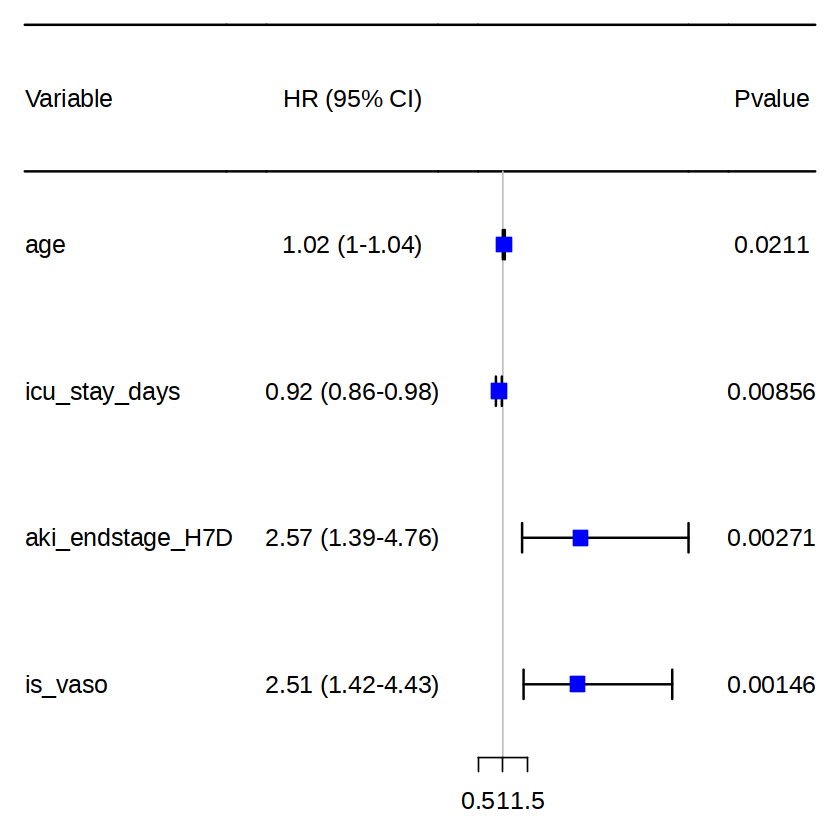

In [ ]:
library(forestplot)
dat=rbind(c("Variable", NA,NA,NA,"HR (95% CI)", "Pvalue"),mulcox_res_filt)
forestplot(dat[,c(1,5,6)], 
           mean=dat[,2],   
           lower=dat[,3], upper=dat[,4], 
           zero=1,            
           boxsize=0.1,       
           graph.pos=3,
           xticks=c(0.5,1,1.5) ,
           txt_gp=fpTxtGp (
             label=gpar(cex=1.2) ,ticks=gpar(cex=1.2)
            ),
           hrzl_lines=list("1" = gpar(lty=1,lwd=1.5)
                           ,"2" = gpar(lty=1,lwd=1.5)
#                            ,"3"= gpar(lty=1,lwd=1.5)
                          ), 
           col=fpColors ( box = 'blue ' , 
                          lines = ' black ' ,
                          zero = "grey" ),
           lwd.zero=1,
           lwd.ci=1.5, 
           lty.ci=7 ,
           ci.vertices.height=0.1   
)